<a href="https://colab.research.google.com/github/shahab-f/EAI6010-Applications_of_Artificial_Intelligence-Winter_2023/blob/A-star-Path-Planning-in-2D-Grid-Map/EAI6010_ShahabaddinFeghahati_Week5_Winter_2023_rev_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAI6010 - Module 5: Robotic AI Applications

Instructor: Dr. Vladimir Shapiro

Student: Shahabaddin Feghahati

Assignment Data: None

Term: Winter 2023

# Introduction

This study implements the A* algorithm for path planning in a 2D grid-based map represented as a numpy array. A heuristic function is defined to estimate the distance between two points on the map. The astar function takes the numpy array, the starting point, and the goal point as input and utilizes the heuristic function to determine the optimal path. The output is the shortest path between the start and goal points as a list of coordinates, which is visualized using matplotlib. In the second implementation, diagonal moves are added as neighbors in addition to the four standard moves. Next, the code is modified to randomly generate the coordinates of 'S' and 'G'. The simulation is then run in a loop and the path is displayed for each run.

# Body/Analysis

#### Q1. Using Python, create a script to find the shortest path from point S (start) to point G (goal) through a discretized workspace (6 rows by 12 columns). Use 4-connectivity. Kindly refer to the image located in the PDF file named EAI6010_Module5_Robot_Assignment for further information.

#### A1:

In [ ]:
import heapq
import numpy as np


def heuristic(a, b):
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
 
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
 
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
 
    return False

nmap = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,0,0,0],
    [0,0,0,1,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],

])
start, goal = (0, 0), (5, 11)
route = astar(nmap, start, goal)
route = route + [start]
route = route[::-1]
print(route)


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (1, 8), (1, 9), (2, 9), (3, 9), (3, 10), (4, 10), (4, 11), (5, 11)]


This code uses the A* algorithm to find the quickest route from a starting point to a goal point on a 2D grid. To do this, it estimates the distance between the current point and the goal point using a heuristic function. The astar function sets up the necessary data structures and uses a heap queue to keep track of the points that need to be evaluated. It runs in a loop until there are no more points to be evaluated in the queue. In each iteration, the point with the lowest estimated distance is removed from the queue and its neighbors are evaluated. The difference between 4 connectivity and 8 connectivity is determined by the list of neighbors.

#### Q2. Find a way to visualize the calculated path, including the path length, with the final state of the wave expansion.

#### A2:

Path length: 17


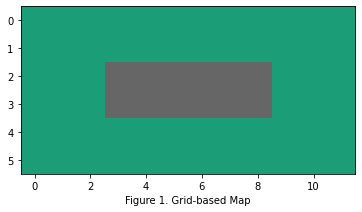

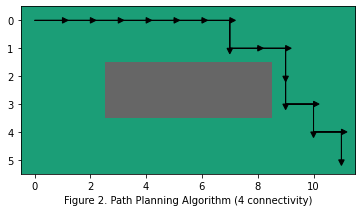

In [ ]:
import matplotlib.pyplot as plt

# Map visualization
plt.imshow(nmap, cmap=plt.cm.Dark2)
plt.xlabel("Figure 1. Grid-based Map")
 
# Path length
print("Path length:", len(route))
 
# Path visualization
fig, ax = plt.subplots()
ax.imshow(nmap, cmap=plt.cm.Dark2)
#ax.scatter(start[1], start[0], marker='o', color='green', s=100)
#ax.scatter(goal[1], goal[0], marker='o', color='red', s=100)
ax.set_xlabel("Figure 2. Path Planning Algorithm (4 connectivity)")

for i in range(len(route)-1):
    start = route[i]
    end = route[i+1]
    ax.arrow(start[1], start[0], end[1] - start[1], end[0] - start[0],
             head_width=0.2, head_length=0.2, fc='k', ec='k')
 
plt.show()

This code displays a grid-based map and the shortest path between a starting and a goal point using the A* algorithm. It also prints the path length. The path is visualized using arrows.

#### Q3. Change to 8-connectivity, recalculate, visualize and interpret the results.

#### A3:

In [ ]:
import heapq
import numpy as np


def heuristic(a, b):
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
 
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
 
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
 
    return False

nmap = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,0,0,0],
    [0,0,0,1,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],

])
start, goal = (0, 0), (5, 11)
route = astar(nmap, start, goal)
route = route + [start]
route = route[::-1]
print(route)

[(0, 0), (1, 1), (2, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 9), (3, 10), (4, 10), (5, 11)]


The code implements the A* algorithm to find the shortest path between a starting and a goal point on a 2D grid. It uses the heuristic function to estimate the distance between the current point and the goal point. The astar function initializes data structures and sets up a heap queue to keep track of the next points to be evaluated. It enters a loop that continues until there are no more points to be evaluated in the queue. In each iteration, it pops the point with the lowest estimated distance from the queue and evaluates its neighbors. The difference between 4 connectivity and 8 connectivity is in the neighbors list. In 8 connectivity, all eight neighbors, including the diagonal ones, are considered. The code uses 8 connectivity. Finally, the function returns False if no path is found.

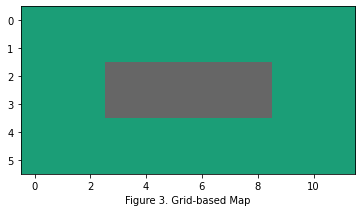

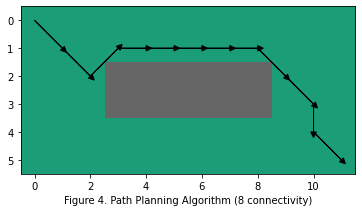

In [ ]:

import matplotlib.pyplot as plt

# Map visualization
plt.imshow(nmap, cmap=plt.cm.Dark2)
plt.xlabel("Figure 3. Grid-based Map")

# Path visualization
fig, ax = plt.subplots()
ax.imshow(nmap, cmap=plt.cm.Dark2)
#ax.scatter(start[1], start[0], marker='o', color='green', s=100)
#ax.scatter(goal[1], goal[0], marker='o', color='red', s=100)
ax.set_xlabel("Figure 4. Path Planning Algorithm (8 connectivity)")
 
for i in range(len(route)-1):
    start = route[i]
    end = route[i+1]
    ax.arrow(start[1], start[0], end[1] - start[1], end[0] - start[0],
             head_width=0.2, head_length=0.2, fc='k', ec='k')
 
plt.show()

The code uses matplotlib to visualize the map and path generated by A* algorithm. It first displays the map as an image and then iterates over the route to draw arrows between consecutive points. Finally, it displays the visualization.

#### Q4. Modify the code so that the coordinates of 'S' and 'G' are randomly generated (obviously, the locations of those cannot be in the obstacle area). Run this simulation in a loop. At the end of each simulation, display the path. For the sake of the exercise, repeat the loop just three times. Either connectivity (4 or 8) is acceptable. For simplicity, you can restrict randomly generated 'S's to the left half and 'G's to the right half.

#### A4:

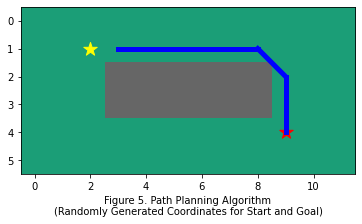

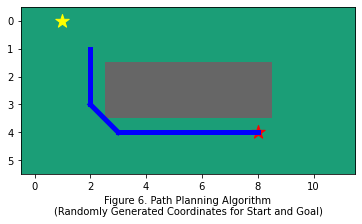

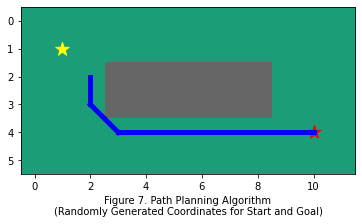

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop

# Define the grid
grid = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,0,0,0],
    [0,0,0,1,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]
])

# Define the heuristic function
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

# Define the A* algorithm
def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

for i in range(5, 8):
    # Define the start and goal points
    start = (np.random.randint(0, 2), np.random.randint(0, 5))
    goal = (np.random.randint(3, 5), np.random.randint(6, 11))

    # Make sure start and goal are not on the 1's
    while grid[start] == 1 or grid[goal] == 1:
       start = (np.random.randint(0, 2), np.random.randint(0, 5))
       goal = (np.random.randint(3, 5), np.random.randint(6, 11))

    # Find the shortest path
    path = astar(grid, start, goal)

    # Display the path
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap=plt.cm.Dark2)
    ax.scatter(start[1], start[0], marker='*', color='yellow', s=200)
    ax.scatter(goal[1], goal[0], marker='*', color='red', s=200)
    if path:
        for j in range(len(path)-1):
            ax.plot([path[j][1], path[j+1][1]], [path[j][0], path[j+1][0]], color='blue', linewidth=5)
            ax.set_xlabel(f"Figure {i}. Path Planning Algorithm\n(Randomly Generated Coordinates for Start and Goal)")
    plt.show()

The code implements the A* algorithm to find the shortest path between randomly generated start and goal points in a 2D grid with obstacles represented by ones. It generates 3 figures, one for each pair of start and goal points.

Each figure shows the 2D grid with the start and goal points marked with yellow and red stars, respectively. If a path is found, it is displayed with blue lines.

The algorithm first defines the grid and the heuristic function, which is the Euclidean distance between two points. Then it defines the A* algorithm, which uses a priority queue (heap) to keep track of the lowest cost paths found so far. The algorithm expands the node with the lowest estimated cost to the goal and adds its neighbors to the queue. The cost of each neighbor is the sum of the cost of the current node and the heuristic estimate to the goal. The algorithm keeps track of the path from the start to the current node, and stops when it reaches the goal.

The code randomly generates start and goal points and makes sure they are not on obstacles. Then it calls the A* algorithm to find the shortest path between the two points and displays the result.

The result of the code is the display of three figures, each showing the 2D grid with the start and goal points marked with yellow and red stars, respectively. If a path is found, it is displayed with blue lines. If no path is found, the figure will only show the grid with the start and goal points marked. The algorithm may also fail to find a path due to the heuristic not being admissible or consistent, or due to the presence of obstacles that block all possible paths.

## Conclusion

In conclusion, this study demonstrates the implementation of the A* algorithm for path planning in a 2D grid-based map represented as a numpy array. The algorithm utilizes a heuristic function to estimate the distance between two points on the map and determines the optimal path between the starting and goal points. The study also shows how diagonal moves can be added as neighbors in addition to the standard four moves. Furthermore, the code is modified to randomly generate the coordinates of the starting and goal points, and the simulation is run in a loop to display the path for each run. The results are visualized using matplotlib. The study provides a comprehensive overview of the A* algorithm for path planning in 2D grid-based maps.

## References

*A star search algorithm.* (n.d.). Wikipedia. Retrieved March 22, 2023, from https://en.wikipedia.org/wiki/A*_search_algorithm

Jones, A. (2018, September 14). *Applying the A star Path Finding Algorithm in Python (Part 1: 2D square grid).* Analyticslink. https://www.analytics-link.com/post/2018/09/14/applying-the-a-path-finding-algorithm-in-python-part-1-2d-square-grid

Tech With Tim. (n.d.). *A star Pathfinding Visualization Tutorial - Python A star Path Finding Tutorial* [Video]. YouTube. Retrieved March 22, 2023, from https://www.youtube.com/watch?v=JtiK0DOeI4A